![snap](https://upload.wikimedia.org/wikipedia/commons/8/8e/Getaround_%28Europe%29.png)

# Data Analysis

## Import useful librairies

In [ ]:
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Read and basic statistics about dataset

In [3]:
data = pd.read_excel("src/get_around_delay_analysis.xlsx")

In [4]:
print("ADataset preview :")
display(data.head())

# Display dataset information
print("\nDataset information :")
display(data.info())

# Check for missing values
print("\nPercentage of missing values :")
display(100*data.isnull().sum()/data.shape[0])

# Descriptive statistics
print("\nDescriptive statistics :")
display(data.describe(include='all'))

ADataset preview :


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN



Dataset information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


None


Percentage of missing values :


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64


Descriptive statistics :


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


## Some visualizations

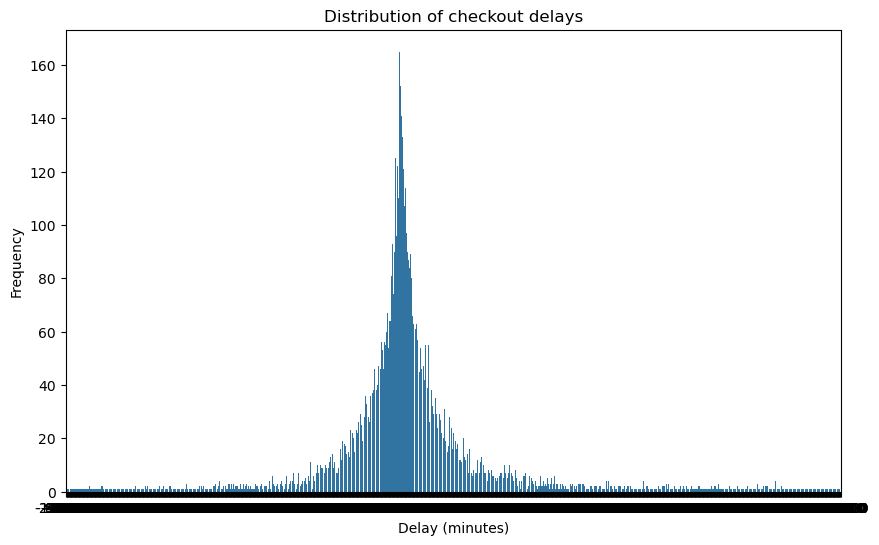

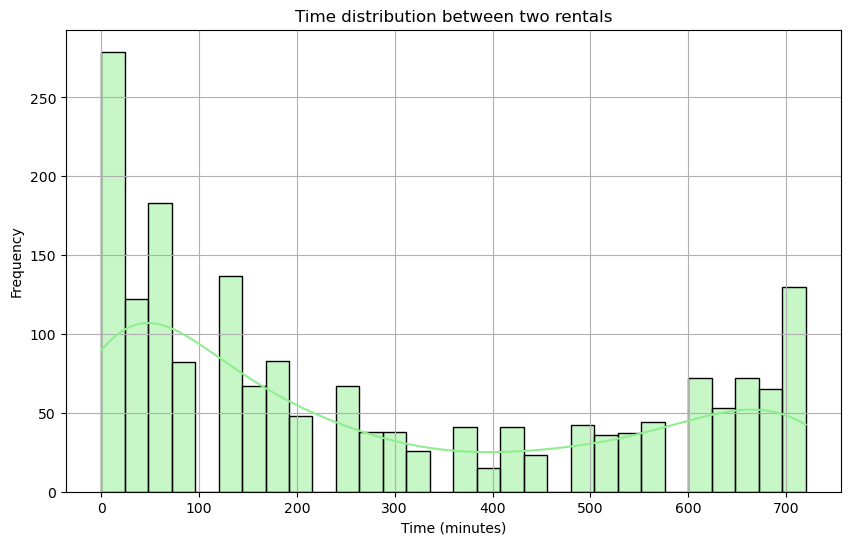

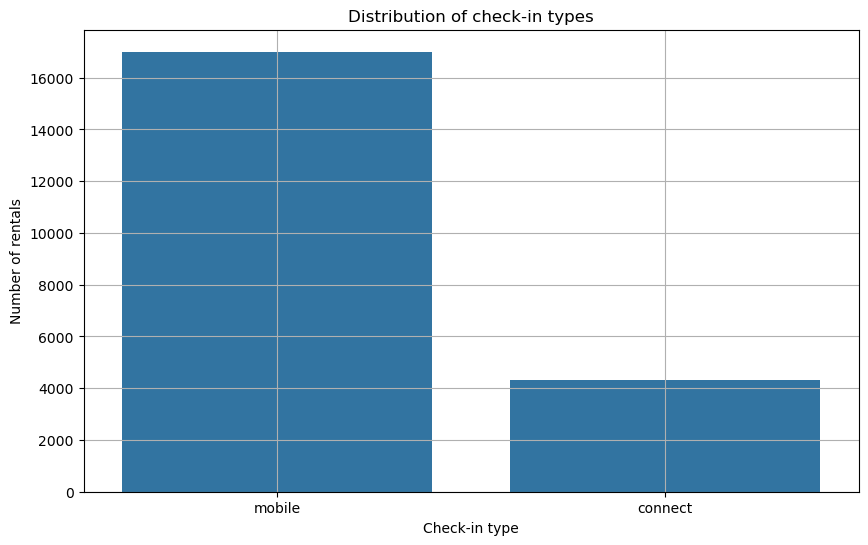

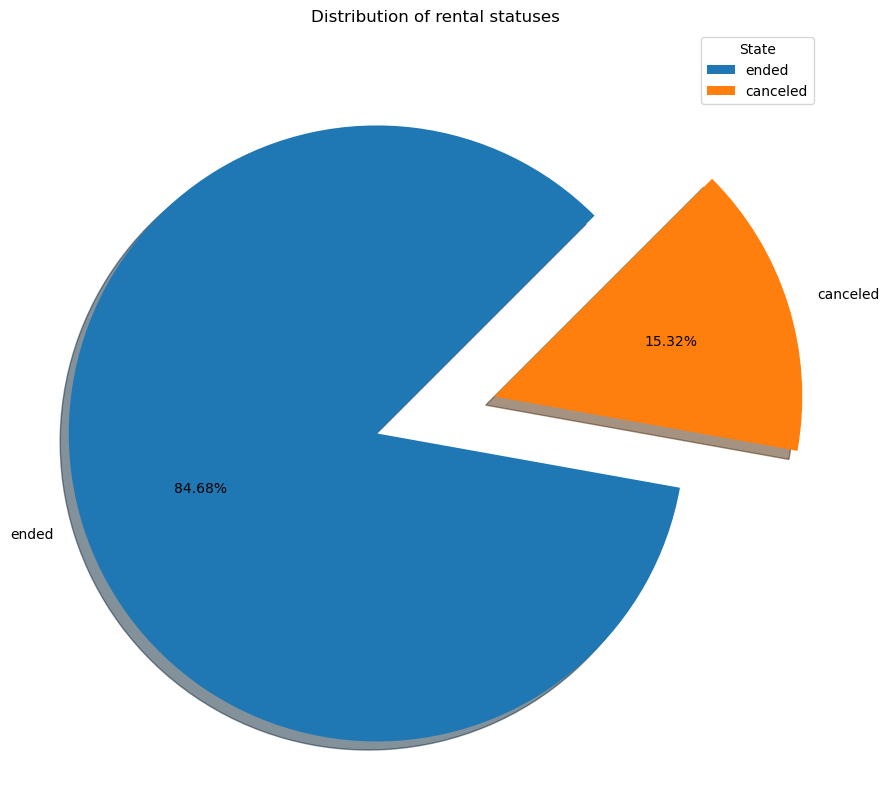

In [5]:
# Visualization of the distribution of checkout delays
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='delay_at_checkout_in_minutes')
plt.title('Distribution of checkout delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()
print()

# Visualization of the time distribution between two rentals
plt.figure(figsize=(10, 6))
sns.histplot(data['time_delta_with_previous_rental_in_minutes'].dropna(), bins=30, kde=True, color='lightgreen')
plt.title('Time distribution between two rentals')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print()

# Visualization of the distribution of check-in types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='checkin_type')
plt.title('Distribution of check-in types')
plt.xlabel('Check-in type')
plt.ylabel('Number of rentals')
plt.grid(True)
plt.show()
print()

# Viewing the distribution of rental statuses
plt.figure(figsize=(10, 6))
state = data['state'].value_counts() * 100
explode = [0.2] * len(state) 
state.plot.pie(
    explode=explode,
    autopct = '%1.2f%%',
    shadow = True,
    startangle=45,
    figsize=(10, 10)
)
plt.legend(labels=state.index, loc='upper right', title='State')
plt.title('Distribution of rental statuses')
plt.ylabel('')
plt.show()

## Getaround Rental Delay Analysis

Analysis of car rental data to assess the potential impact of a minimum delay between rentals.

Percentage of rentals with a delay: 57.53%
Percentage of rentals with an impact on the next rental: 0.00%


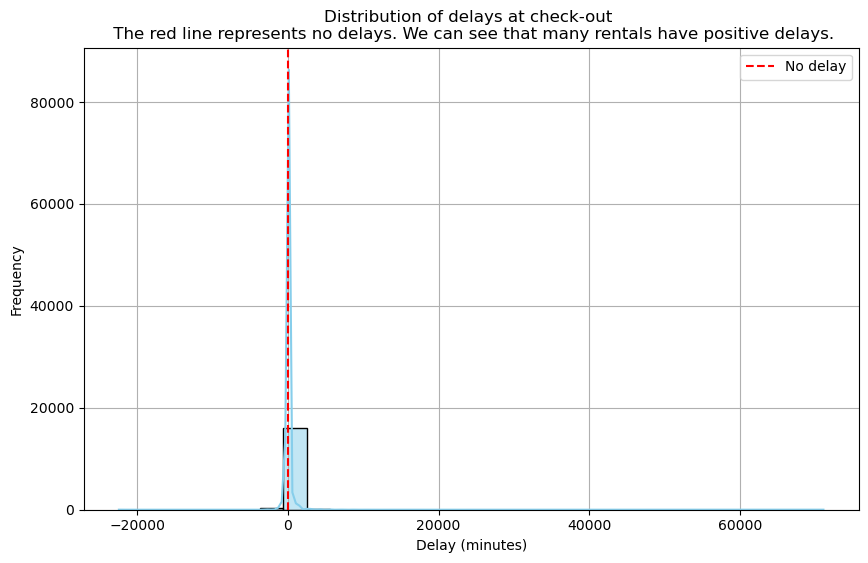

In [6]:
# Analyze the frequency of delays and their impact on the next driver
# Calculate the number of rentals with a late checkout
delayed_checkouts = data['delay_at_checkout_in_minutes'].dropna()

# Calculate the number of rentals with a positive delay (actual delay)
positive_delays = delayed_checkouts[delayed_checkouts >0]

# Calculate the number of rentals with an impact on the next rental
# Consider missing values ​​as unimpacted rentals
impacted_next_rentals = data[data['time_delta_with_previous_rental_in_minutes'].notna() & (data['time_delta_with_previous_rental_in_minutes'] < 0)]

# Calculate the percentage of rentals with a delay and an impact on the next rental
percentage_delayed = len(positive_delays) /len(delayed_checkouts) * 100
percentage_impacted = len(impacted_next_rentals) / len(data) * 100

print(f"Percentage of rentals with a delay: {percentage_delayed:.2f}%")
print(f"Percentage of rentals with an impact on the next rental: {percentage_impacted:.2f}%")

# Visualization of the distribution of delays at check-out
plt.figure(figsize=(10, 6))
sns.histplot(delayed_checkouts, bins=30, kde=True, color='skyblue')
plt.title("Distribution of delays at check-out \n The red line represents no delays. We can see that many rentals have positive delays.")
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='No delay')
plt.legend()
plt.grid(True)
plt.show()

**Impact on next rental:** Missing values ​​in time_delta_with_previous_rental_in_minutes are considered unimpacted cases, as they represent time differences greater than 12 hours.

### Results

- **Delay Frequency:** Approximately 57.53% of rentals have a positive delay at checkout.
- **Impact on the Next Driver:** Currently, there are no subsequent rentals impacted by a delay.

Since we haven't found any impact on the following driver, we must nevertheless seek a threshold and assess their impact on revenue and rentals.

**Threshold for evaluation chosen:** 30 minutes and 60 minutes.

checkin_type
mobile     148
connect    131
Name: count, dtype: int64

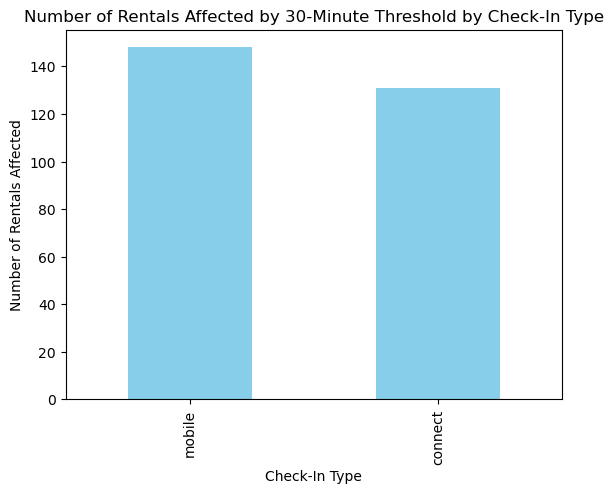

Percentage of affected rentals (30-minute threshold) for Connect: 3.04%
Percentage of affected rentals (30-minute threshold) for Mobile: 0.87%
Number of problem cases resolved (30-minute threshold): 136


In [7]:
# Analyze the impact of 30 minute thresholds on revenue and rentals

# Calculate rentals affected by a 30-minute threshold
affected_rentals_30 = data[data['time_delta_with_previous_rental_in_minutes'] <30]

# Calculate the number of rentals affected for each check-in type
affected_rentals_30_by_type = affected_rentals_30['checkin_type'].value_counts()
display(affected_rentals_30_by_type)

affected_rentals_30_by_type.plot(kind='bar', color='skyblue')
plt.title('Number of Rentals Affected by 30-Minute Threshold by Check-In Type')
plt.xlabel('Check-In Type')
plt.ylabel('Number of Rentals Affected')
plt.show()

affected_rentals_30_connect = affected_rentals_30[affected_rentals_30['checkin_type'] == 'connect']
affected_rentals_30_mobile = affected_rentals_30[affected_rentals_30['checkin_type'] == 'mobile']

# Calculate the percentage of affected rentals compared to the total rentals for each check-in type
total_rentals_connect = len(data[data['checkin_type'] == 'connect'])
total_rentals_mobile = len(data[data['checkin_type'] == 'mobile'])

percentage_affected_30_connect = len(affected_rentals_30_connect) / total_rentals_connect * 100
percentage_affected_30_mobile = len(affected_rentals_30_mobile) / total_rentals_mobile * 100

print(f"Percentage of affected rentals (30-minute threshold) for Connect: {percentage_affected_30_connect:.2f}%")
print(f"Percentage of affected rentals (30-minute threshold) for Mobile: {percentage_affected_30_mobile:.2f}%")

# Calculate the number of problem cases resolved (rentals with a 30-minute threshold)
problem_cases_resolved_30 = affected_rentals_30[affected_rentals_30['delay_at_checkout_in_minutes'] >0]

print(f"Number of problem cases resolved (30-minute threshold): {len(problem_cases_resolved_30)}")


checkin_type
mobile     220
connect    181
Name: count, dtype: int64

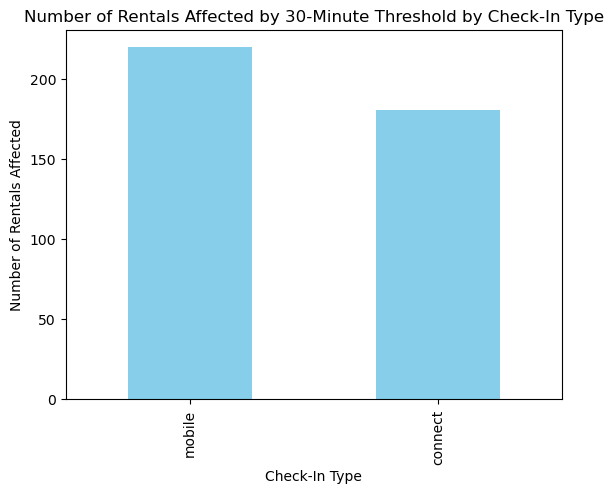

Percentage of affected rentals (60-minute threshold) for Connect: 4.20%
Percentage of affected rentals by 60-minute threshold for mobile: 1.29%
Number of problem cases resolved (60-minute threshold): 193


In [ ]:
# Analyze the impact of 60 minute thresholds on revenue and rentals

# Calculate rentals affected by a 60-minute threshold
affected_rentals_60 = data[data['time_delta_with_previous_rental_in_minutes'] <60]

# Calculate the number of rentals affected for each check-in type
affected_rentals_60_by_type = affected_rentals_60['checkin_type'].value_counts()
display(affected_rentals_60_by_type)

affected_rentals_60_by_type.plot(kind='bar', color='skyblue')
plt.title('Number of Rentals Affected by 60-Minute Threshold by Check-In Type')
plt.xlabel('Check-In Type')
plt.ylabel('Number of Rentals Affected')
plt.show()

affected_rentals_60_connect = affected_rentals_60[affected_rentals_60['checkin_type'] == 'connect']
affected_rentals_60_mobile = affected_rentals_60[affected_rentals_60['checkin_type'] == 'mobile']

# Calculate the percentage of affected rentals compared to the total rentals for each check-in type
percentage_affected_60_connect = len(affected_rentals_60_connect) / total_rentals_connect * 100
percentage_affected_60_mobile = len(affected_rentals_60_mobile) / total_rentals_mobile * 100

# Print the results
print(f"Percentage of affected rentals (60-minute threshold) for Connect: {percentage_affected_60_connect:.2f}%")
print(f"Percentage of affected rentals by 60-minute threshold for mobile: {percentage_affected_60_mobile:.2f}%")

# Calculate the number of problem cases resolved (rentals with a 60-minute threshold)
problem_cases_resolved_60 = affected_rentals_60[affected_rentals_60['delay_at_checkout_in_minutes'] >0]

print(f"Number of problem cases resolved (60-minute threshold): {len(problem_cases_resolved_60)}")

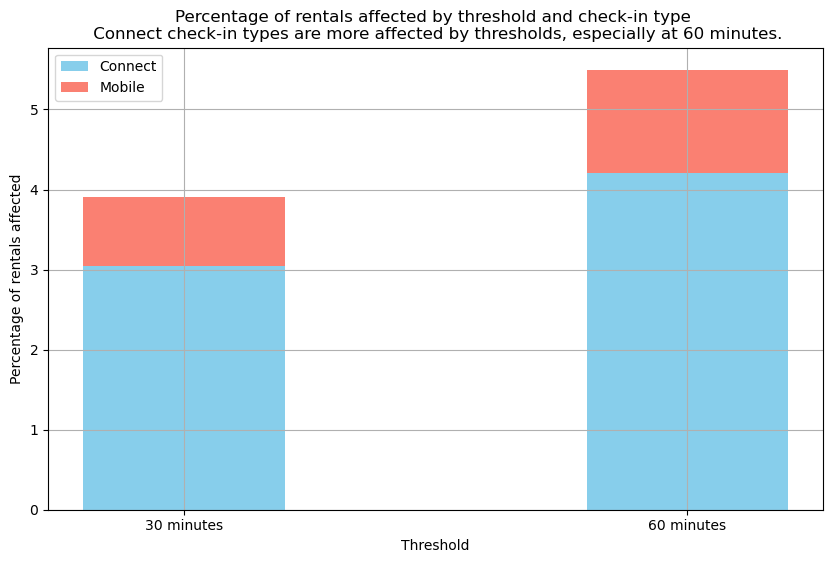

In [9]:
# Compare the impact of 30 and 60 minute thresholds on revenue and rentals
seuils = ['30 minutes', '60 minutes']
connect_affected = [percentage_affected_30_connect, percentage_affected_60_connect]
mobile_affected = [percentage_affected_30_mobile, percentage_affected_60_mobile]

plt.figure(figsize=(10, 6))
plt.bar(seuils, connect_affected, width=0.4, label='Connect', color='skyblue')
plt.bar(seuils, mobile_affected, width=0.4, label='Mobile', color='salmon', bottom=connect_affected)

plt.title('Percentage of rentals affected by threshold and check-in type \n Connect check-in types are more affected by thresholds, especially at 60 minutes.')
plt.xlabel('Threshold')
plt.ylabel('Percentage of rentals affected')
plt.legend()
plt.grid(True)
plt.show()

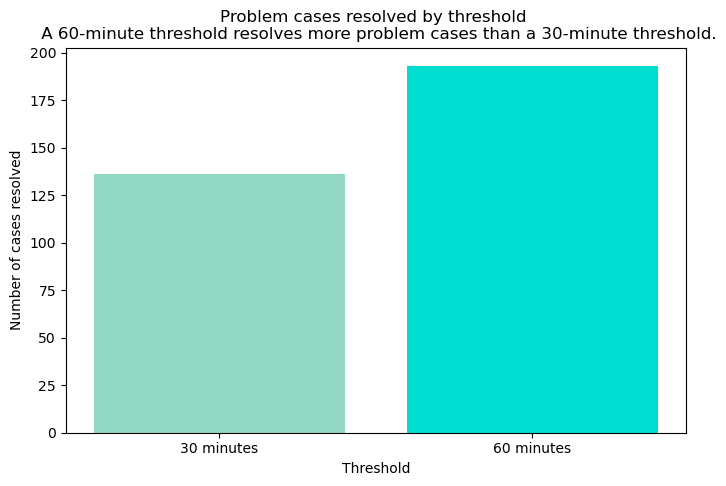

In [10]:
# Problem cases resolved by threshold
plt.figure(figsize=(8, 5))
plt.bar(['30 minutes', '60 minutes'], [len(problem_cases_resolved_30), len(problem_cases_resolved_60)], color=['#93D7C5', '#00DDD1'])
plt.title('Problem cases resolved by threshold \n A 60-minute threshold resolves more problem cases than a 30-minute threshold.')
plt.xlabel('Threshold')
plt.ylabel('Number of cases resolved')
plt.show()

### Results

**Potentially affected revenue share:**

To assess the revenue impact, we need to estimate how many rentals would be canceled due to the delay. 

This depends on the occupancy rate and the revenue generated by each rental. The percentages of affected rentals provide an indication of the potential revenue impact.

**Rentals affected by the feature:**

**30-minute threshold:**
- **Connect Cars:** 3.04% of rentals would be affected.
- **Mobile Cars:** 0.87% of rentals would be affected.

**60-minute threshold:**
- **Connect Cars:** 4.20% of rentals would be affected.
- **Mobile Cars:** 1.29% of rentals would be affected.

**Reminder:**

**Frequency of delays and impact on the next driver:**

Approximately 57.53% of rentals have a positive checkout delay. Currently, there are no cases where a delay directly impacts the next rental in the data provided.

**Problem cases resolved:**
- **30-minute threshold:** 136 problem cases would be resolved.
- **60-minute threshold:** 193 problem cases would be resolved.

# Machine Learning

## Import useful libraries

In [ ]:
# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

# Pipeline
from sklearn.pipeline import Pipeline

# Model building
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import root_mean_squared_error

# Save the model
import joblib


## Exploratory Data Analysis

### Read and basic statistics

In [65]:
price = pd.read_csv("src/get_around_pricing_project.csv", index_col=0)

In [66]:
print("Dataset preview :")
display(price.head())

# Display dataset information
print("\nDataset information :")
display(price.info())

# Check for missing values
print("\nPercentage of missing values :")
display(100*price.isnull().sum()/price.shape[0])

# Descriptive statistics
print("\nDescriptive statistics :")
display(price.describe(include='all'))

Dataset preview :


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183



Dataset information :
<class 'pandas.core.frame.DataFrame'>
Index: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   model_key                  4843 non-null   object
 1   mileage                    4843 non-null   int64 
 2   engine_power               4843 non-null   int64 
 3   fuel                       4843 non-null   object
 4   paint_color                4843 non-null   object
 5   car_type                   4843 non-null   object
 6   private_parking_available  4843 non-null   bool  
 7   has_gps                    4843 non-null   bool  
 8   has_air_conditioning       4843 non-null   bool  
 9   automatic_car              4843 non-null   bool  
 10  has_getaround_connect      4843 non-null   bool  
 11  has_speed_regulator        4843 non-null   bool  
 12  winter_tires               4843 non-null   bool  
 13  rental_price_per_day       4843 non-null   in

None


Percentage of missing values :


model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64


Descriptive statistics :


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [67]:
# Some information about each column:
for col in price.columns :
    print(price[col].value_counts())
    print('-----------------------------------')

model_key
Citroën        969
Renault        916
BMW            827
Peugeot        642
Audi           526
Nissan         275
Mitsubishi     231
Mercedes        97
Volkswagen      65
Toyota          53
SEAT            46
Subaru          44
Opel            33
Ferrari         33
PGO             33
Maserati        18
Suzuki           8
Porsche          6
Ford             5
KIA Motors       3
Alfa Romeo       3
Fiat             2
Lexus            2
Lamborghini      2
Mini             1
Mazda            1
Honda            1
Yamaha           1
Name: count, dtype: int64
-----------------------------------
mileage
123492    2
108352    2
180606    2
72760     2
78156     2
         ..
133178    1
105959    1
193231    1
84058     1
195840    1
Name: count, Length: 4786, dtype: int64
-----------------------------------
engine_power
135    882
120    785
85     631
100    570
105    451
      ... 
224      1
121      1
239      1
236      1
261      1
Name: count, Length: 61, dtype: int64
--------

### Merge some columns in a single column

In [68]:
# Merge has_air_conditioning and has_speed_regulator into a single column comfort_features_count
price["comfort_features_count"] = price[['has_air_conditioning', 'has_speed_regulator', 'automatic_car', 'winter_tires']].sum(axis=1)

# Drop the original columns
price.drop(['has_air_conditioning', 'has_speed_regulator', 'automatic_car', 'winter_tires'], axis=1, inplace=True)

# Merge private_parking_available and has_getaround_connect into a single column premium_features_count
price["premium_features"] = price[['private_parking_available', "has_getaround_connect", 'has_gps']].sum(axis=1)

# Drop the original columns
price.drop(['private_parking_available', "has_getaround_connect", 'has_gps'], axis=1, inplace=True)

### Numeric columns

mileage                   3.623648e+09
engine_power              1.520482e+03
comfort_features_count    7.984742e-01
premium_features          1.037316e+00
dtype: float64


,mileage,engine_power,comfort_features_count,premium_features
mileage,1.000000,-0.050116,0.007439,0.058601
engine_power,-0.050116,1.000000,0.454133,0.406850
comfort_features_count,0.007439,0.454133,1.000000,0.478863
premium_features,0.058601,0.406850,0.478863,1.000000


Columns with low variance: []
Correlation with target variable:


rental_price_per_day      1.000000
engine_power              0.625645
premium_features          0.417089
comfort_features_count    0.411821
mileage                  -0.448912
Name: rental_price_per_day, dtype: float64

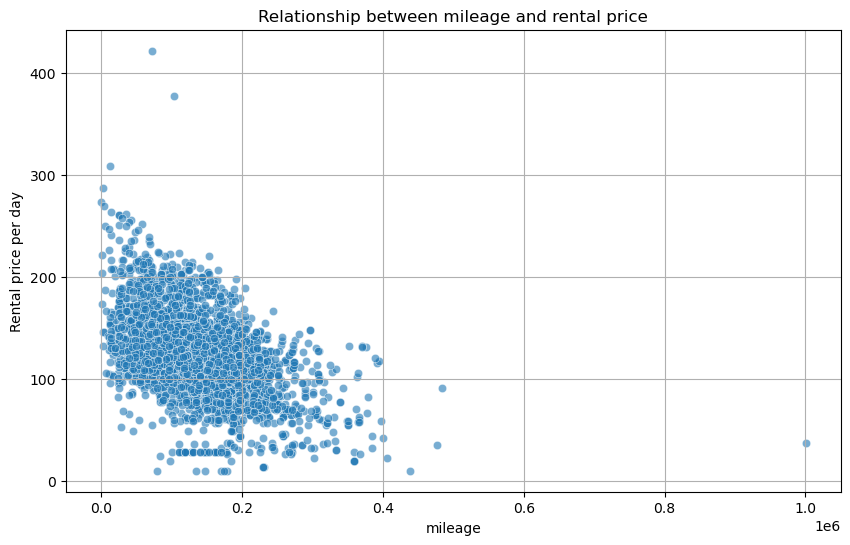

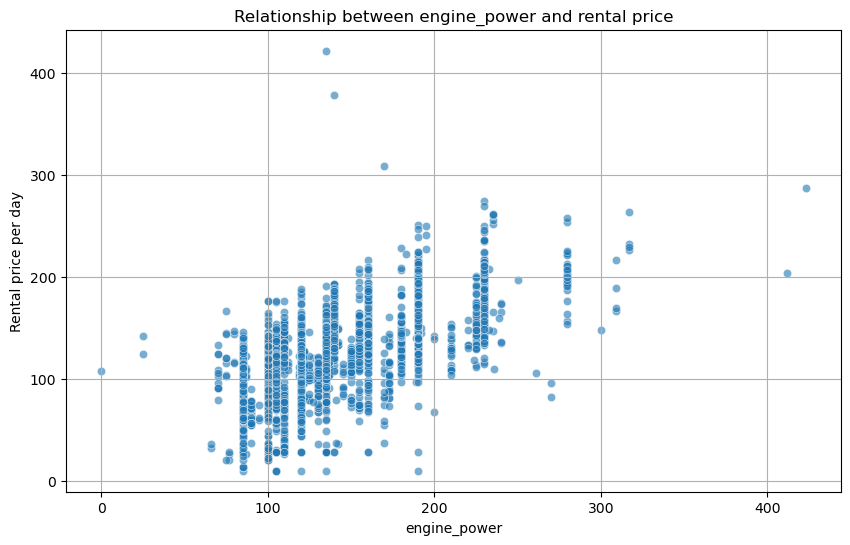

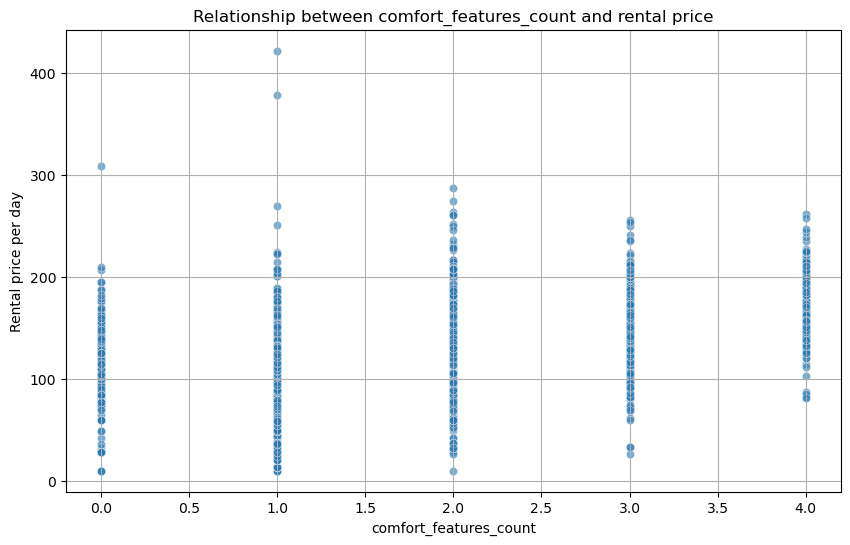

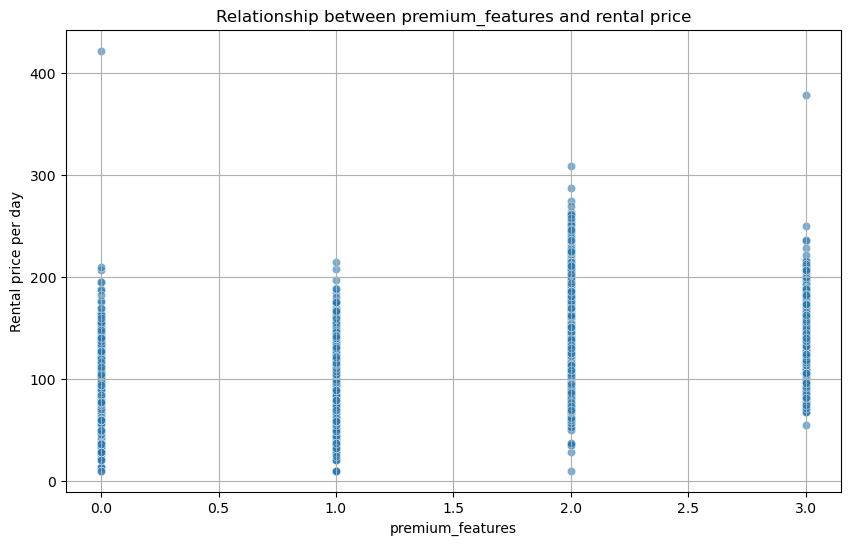

In [69]:
# Exclude target variable 'rental_price_per_day' from numeric columns
numeric_columns = price.select_dtypes(include=['float64', 'int64']).drop(columns=['rental_price_per_day'])

# Check the variance of numeric columns
variance = numeric_columns.var()
print(variance)

# Check the correlation between numeric columns
correlation_matrix = numeric_columns.corr()
display(correlation_matrix)

# Check low variance with numeric columns
low_variance_columns = variance[variance < 0.01].index
print("Columns with low variance:", list(low_variance_columns))

# Check correlation with target variable (excluding target column from numeric columns)
correlation_with_target = price[numeric_columns.columns.tolist() + ['rental_price_per_day']].corr()['rental_price_per_day'].sort_values(ascending=False)
print("Correlation with target variable:")
display(correlation_with_target)

# Plot distributions of numeric columns (excluding target variable)
for feature in numeric_columns.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=price[feature], y=price['rental_price_per_day'], alpha=0.6)
    plt.title(f'Relationship between {feature} and rental price')
    plt.xlabel(feature)
    plt.ylabel('Rental price per day')
    plt.grid(True)
    plt.show()


### Categorical columns

Column: model_key, Number of Categories: 28
Column: fuel, Number of Categories: 4
Column: paint_color, Number of Categories: 10
Column: car_type, Number of Categories: 8


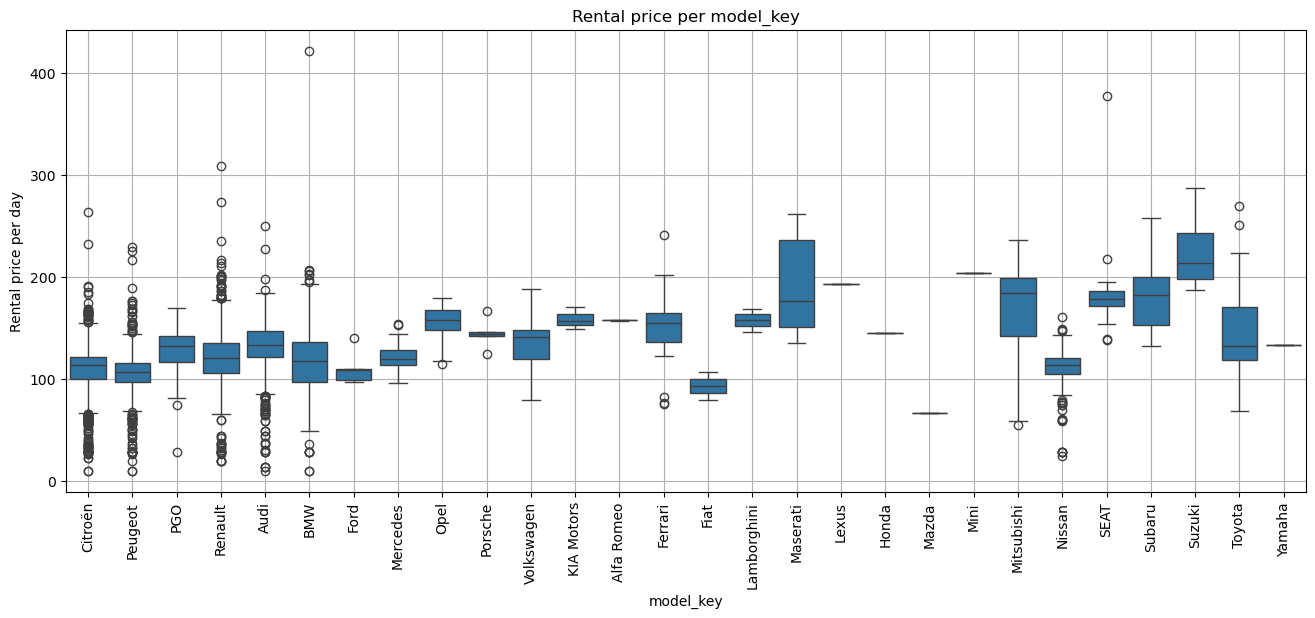

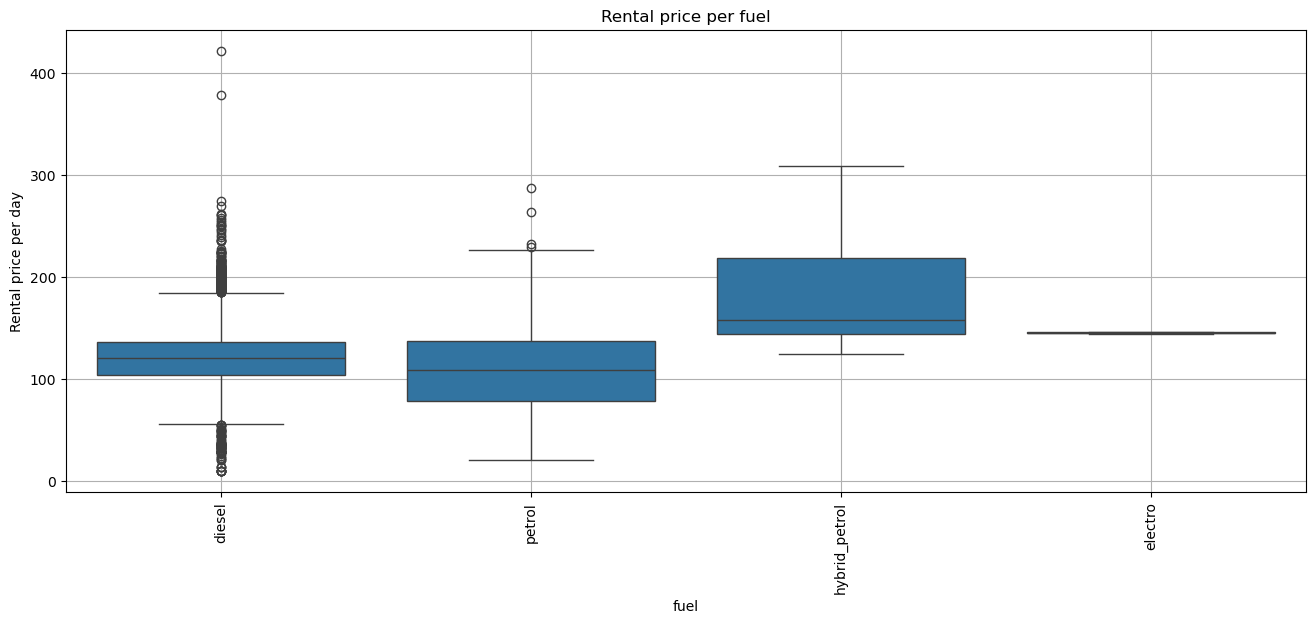

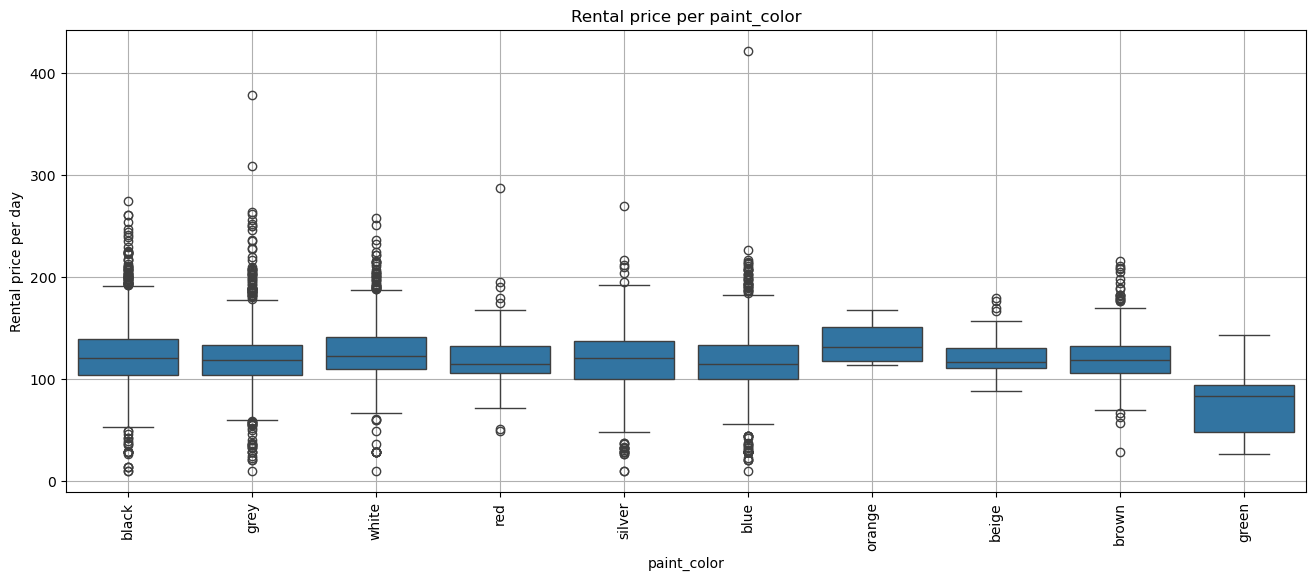

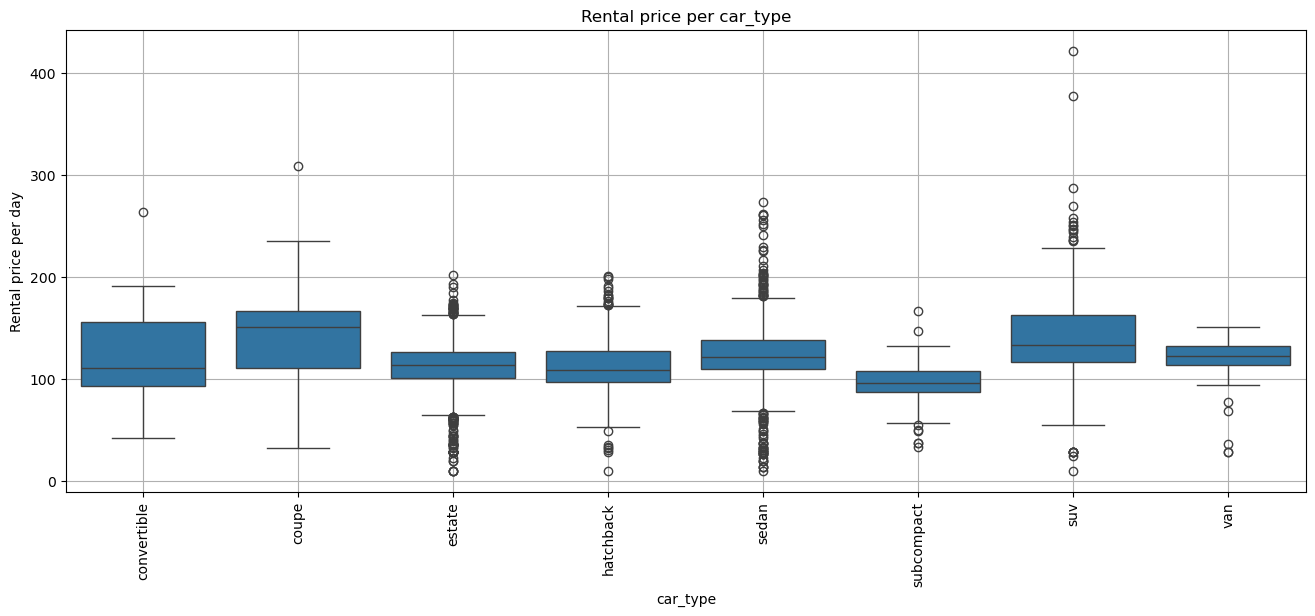

In [70]:
# Check the number of categories for each categorical column
categorical_columns = price.select_dtypes(include=['object'])
for column in categorical_columns:
    num_categories = len(price[column].unique())
    print(f"Column: {column}, Number of Categories: {num_categories}")

# Plot the distribution of categorical variables
for feature in categorical_columns:
    plt.figure(figsize=(16, 6))
    sns.boxplot(x=feature, y='rental_price_per_day', data=price)
    plt.title(f'Rental price per {feature}')
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('Rental price per day')
    plt.grid(True)
    plt.show()

### Target variable

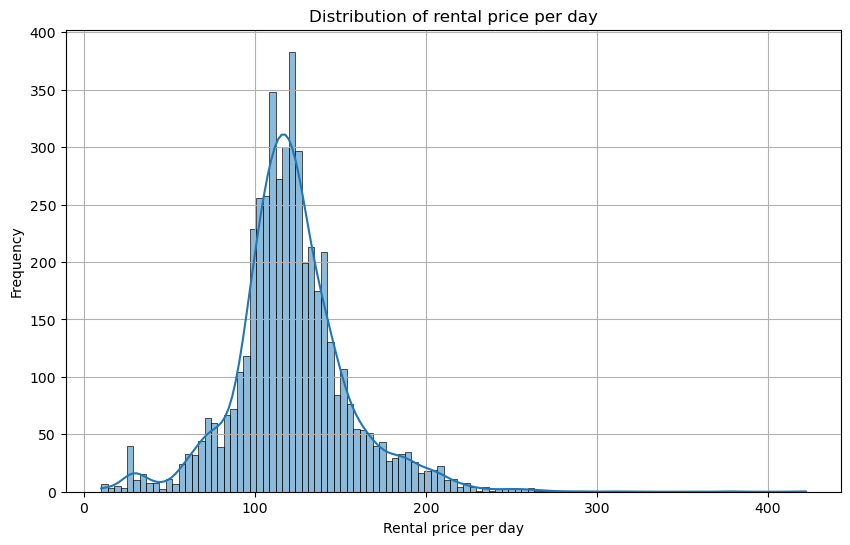

In [71]:
# Distribution of rental price per day
plt.figure(figsize=(10, 6))
sns.histplot(price['rental_price_per_day'], kde=True)
plt.title('Distribution of rental price per day')
plt.xlabel('Rental price per day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Preprocessing

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['model_key', 'fuel', 'paint_color', 'car_type']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Separate features (X) and target (y)
X = data.drop(columns=['rental_price_per_day'])
y = data['rental_price_per_day']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Model

In [ ]:
# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')

# Save the model
joblib.dump(model, 'src/model.pkl')

# # Save the scaler and label encoders
# joblib.dump(scaler, 'src/scaler.pkl')
# joblib.dump(label_encoders, 'src/label_encoders.pkl')

Root Mean Squared Error: 16.99027359709151


['src/label_encoders.pkl']

In [79]:
X_scaled[:5]

array([[-0.90137595, -0.00916755, -0.7434913 , -0.20744292, -0.95642113,
        -2.20994912,  0.90515678,  0.51139656, -0.50303092, -0.49786972,
         1.0824735 ,  1.77281052,  0.26997104],
       [-0.90137595, -2.11052817,  4.82213343,  4.88366882,  0.46289786,
        -2.20994912,  0.90515678,  0.51139656, -0.50303092, -0.49786972,
        -0.92381014,  1.77281052,  0.26997104],
       [-0.90137595,  0.70333661, -0.2305305 , -0.20744292,  1.88221686,
        -2.20994912, -1.10478099, -1.95542967, -0.50303092, -0.49786972,
         1.0824735 , -0.56407607,  0.26997104],
       [-0.90137595, -0.2147813 ,  0.15419011, -0.20744292,  1.17255736,
        -2.20994912,  0.90515678,  0.51139656, -0.50303092, -0.49786972,
         1.0824735 ,  1.77281052,  0.26997104],
       [-0.90137595, -0.72878246,  0.79539111, -0.20744292,  1.52738711,
        -2.20994912,  0.90515678,  0.51139656, -0.50303092, -0.49786972,
        -0.92381014,  1.77281052,  0.26997104]])

## Feature Importance

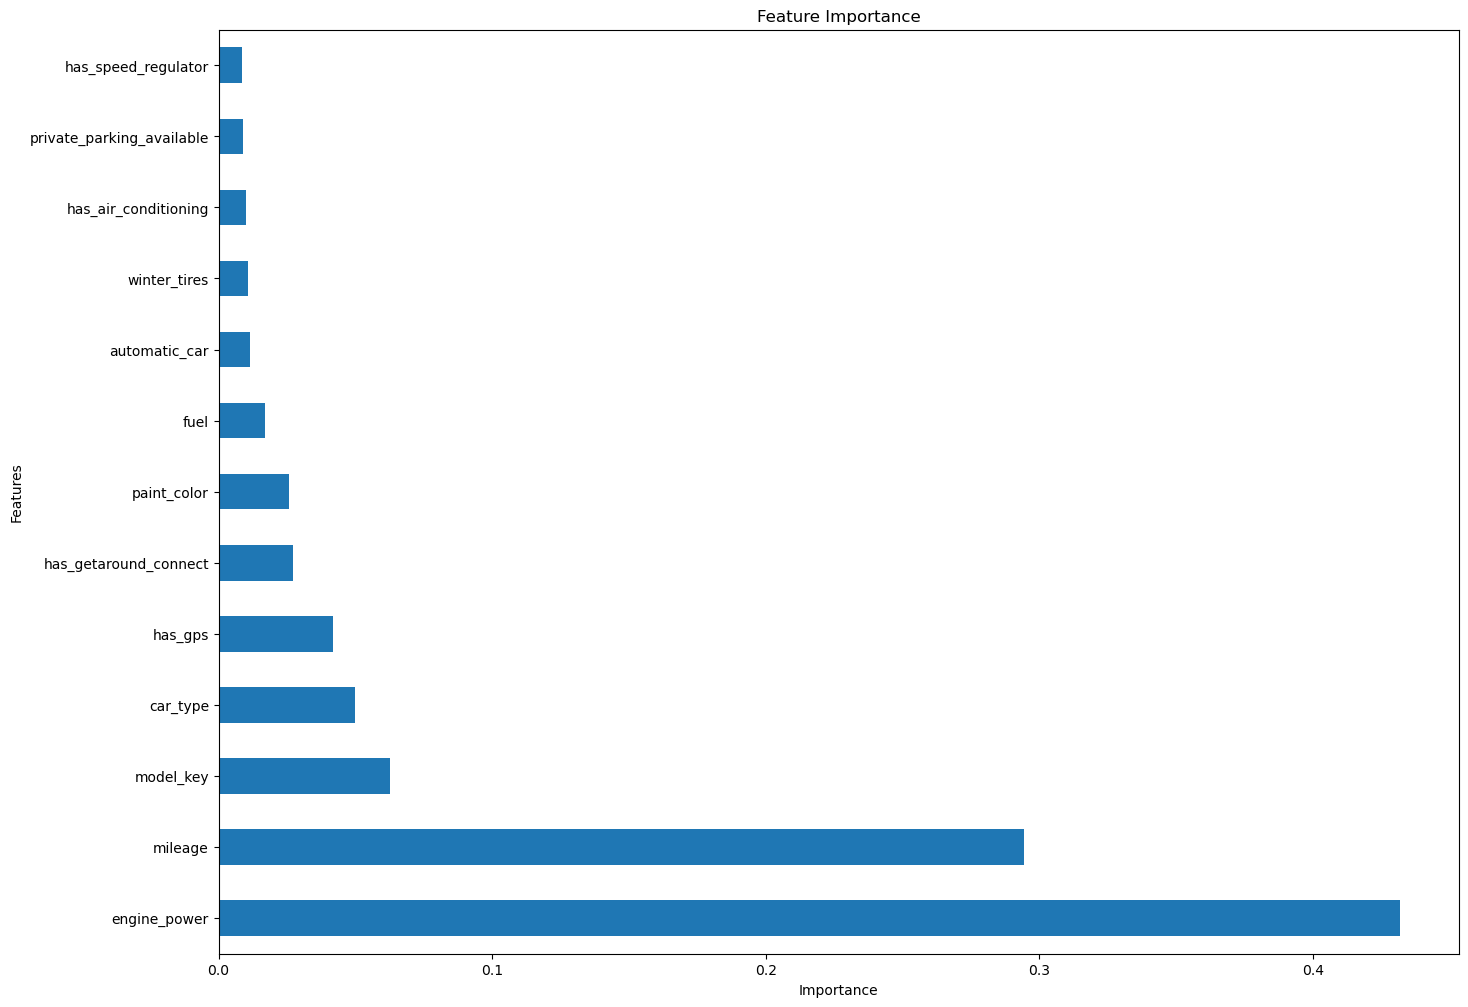

In [80]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize the feature importance
plt.figure(figsize=(16, 12))
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

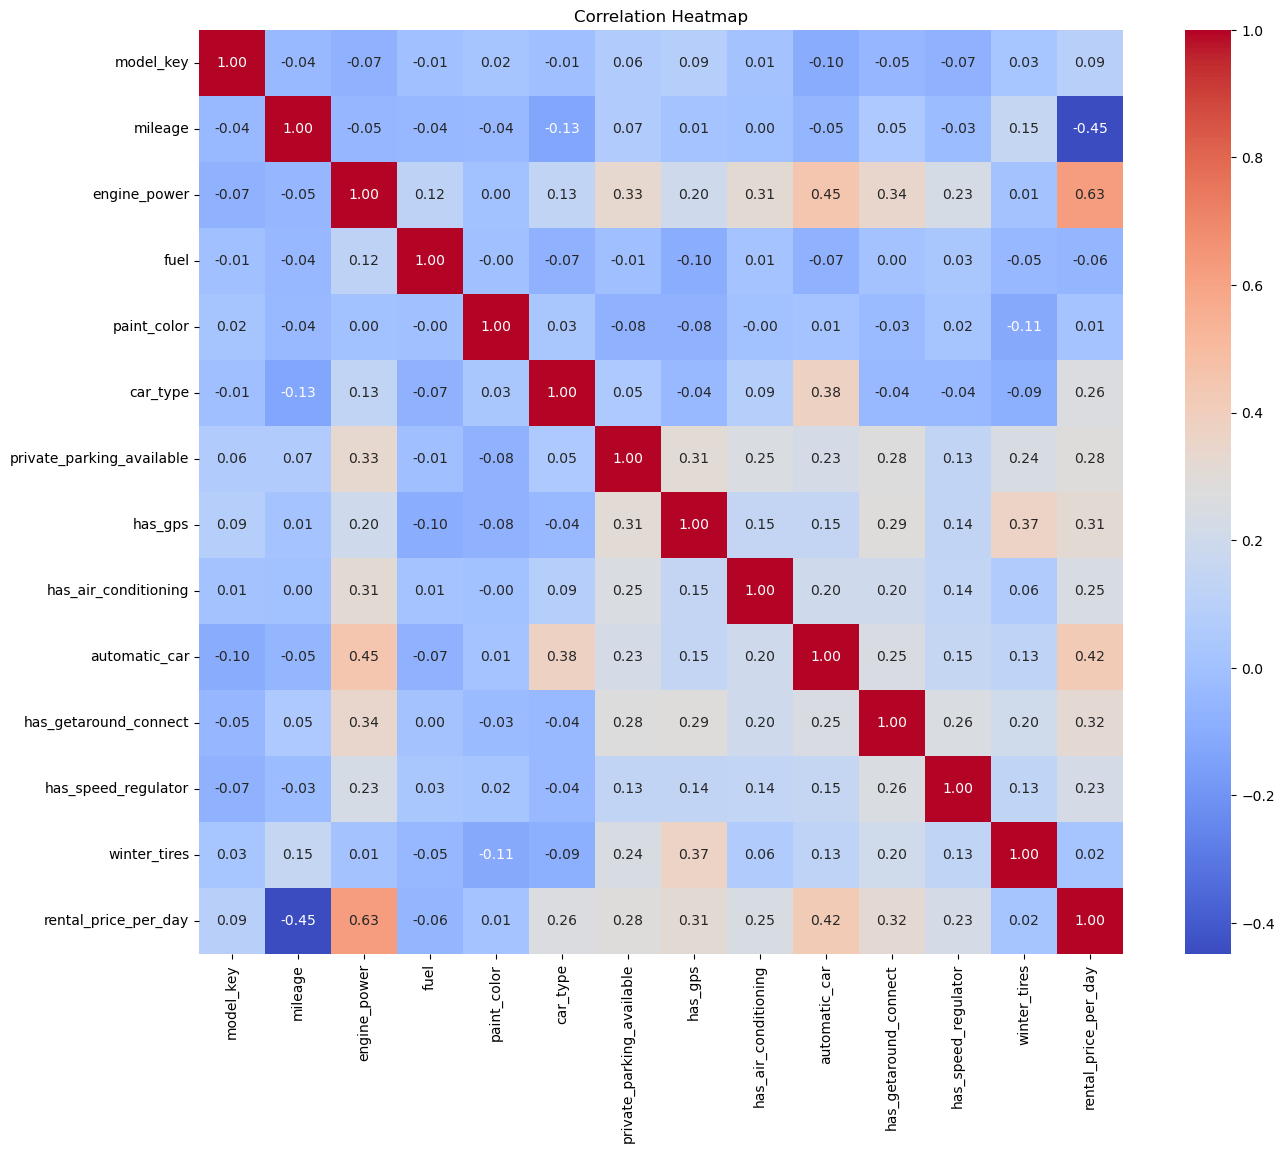

In [ ]:
# Correlation Heatmap
correlation_matrix = pd.concat([X, y], axis=1).corr()

import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


## Conclusion

**Model performance**

An RMSE of 16.99 € means that on average the model's predictions are off by 17.03 €. \
This is significant improvement from the baseline model's RMSE (linear regression model) of 19.13 €. 

**Background**

In our case, an RMSE of 17.03 € could be considered acceptable.